# Linear Regression From Scratch.

This is a notebook which will implement the linear regression model from scratch to predict the salary of a person given his\her years of experience. the linear regression model uses batch gradient descent to optimize the loss of the predictions and mean squared error as the loss function.

In [2]:
from linear_regression import Linear_Regressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The dataset we are going to work with has two columns the years of expirence and the salaries. 

In [3]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Seperating the Independent variable x from the dependent variable y, in our case <b>Years of Experience</b> is the independent variable while the <b>Salary</b> is the dependent variable because it is what we want to predict.
We will also make them numpy arrays for the machine learning model to work with.

In [30]:
X = np.array(dataset.iloc[:,0:1])
y = np.array(dataset.iloc[:,1])
print(X[:5],y[:5])

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]] [39343. 46205. 37731. 43525. 39891.]


## Spliting the Data !

The next step is to split the data to training and testing data for the machine learning model to train and predict. 

In [31]:
def split_data(X,y,ratio=0.25):
    assert len(X) == len(y)
    n = len(X)
    index = int(n * (1 - ratio))
    X_train = X[:index]
    y_train = y[:index]
    X_test = X[index:]
    y_test = y[index:]
    
    return X_train,y_train,X_test,y_test

In [32]:
X_train, y_train, X_test, y_test = split_data(X,y,0.30)

To train the model we use the linear regression model imported earlier in the note and the the training dataset.

In [33]:
model = Linear_Regressor()

In [34]:
model.train(X_train,y_train,epochs=20000,alpha=0.00001,verbose=1)

Epoch: 0 val loss ========================> [1.97362798e+09]
Epoch: 1 val loss ========================> [1.94821846e+09]
Epoch: 2 val loss ========================> [1.92316079e+09]
Epoch: 3 val loss ========================> [1.89844999e+09]
Epoch: 4 val loss ========================> [1.87408116e+09]
Epoch: 5 val loss ========================> [1.85004947e+09]
Epoch: 6 val loss ========================> [1.82635014e+09]
Epoch: 7 val loss ========================> [1.80297848e+09]
Epoch: 8 val loss ========================> [1.77992986e+09]
Epoch: 9 val loss ========================> [1.7571997e+09]
Epoch: 10 val loss ========================> [1.73478351e+09]
Epoch: 11 val loss ========================> [1.71267686e+09]
Epoch: 12 val loss ========================> [1.69087537e+09]
Epoch: 13 val loss ========================> [1.66937473e+09]
Epoch: 14 val loss ========================> [1.6481707e+09]
Epoch: 15 val loss ========================> [1.62725908e+09]
Epoch: 16 val loss =

Epoch: 276 val loss ========================> [1.35082088e+08]
Epoch: 277 val loss ========================> [1.34365003e+08]
Epoch: 278 val loss ========================> [1.33656047e+08]
Epoch: 279 val loss ========================> [1.32955117e+08]
Epoch: 280 val loss ========================> [1.32262113e+08]
Epoch: 281 val loss ========================> [1.31576935e+08]
Epoch: 282 val loss ========================> [1.30899484e+08]
Epoch: 283 val loss ========================> [1.30229664e+08]
Epoch: 284 val loss ========================> [1.29567378e+08]
Epoch: 285 val loss ========================> [1.28912532e+08]
Epoch: 286 val loss ========================> [1.28265034e+08]
Epoch: 287 val loss ========================> [1.27624791e+08]
Epoch: 288 val loss ========================> [1.26991712e+08]
Epoch: 289 val loss ========================> [1.26365708e+08]
Epoch: 290 val loss ========================> [1.25746691e+08]
Epoch: 291 val loss ========================> [1.251345

Epoch: 571 val loss ========================> [68319313.80647363]
Epoch: 572 val loss ========================> [68269767.24310997]
Epoch: 573 val loss ========================> [68220550.31156085]
Epoch: 574 val loss ========================> [68171660.04518493]
Epoch: 575 val loss ========================> [68123093.5073973]
Epoch: 576 val loss ========================> [68074847.79132812]
Epoch: 577 val loss ========================> [68026920.0194855]
Epoch: 578 val loss ========================> [67979307.34342214]
Epoch: 579 val loss ========================> [67932006.94340685]
Epoch: 580 val loss ========================> [67885016.02809966]
Epoch: 581 val loss ========================> [67838331.8342307]
Epoch: 582 val loss ========================> [67791951.62628421]
Epoch: 583 val loss ========================> [67745872.69618504]
Epoch: 584 val loss ========================> [67700092.36298993]
Epoch: 585 val loss ========================> [67654607.97258256]
Epoch: 586 va

Epoch: 824 val loss ========================> [61540121.35328208]
Epoch: 825 val loss ========================> [61525113.16109321]
Epoch: 826 val loss ========================> [61510148.00396832]
Epoch: 827 val loss ========================> [61495225.5696472]
Epoch: 828 val loss ========================> [61480345.54834813]
Epoch: 829 val loss ========================> [61465507.63274673]
Epoch: 830 val loss ========================> [61450711.51795498]
Epoch: 831 val loss ========================> [61435956.90150075]
Epoch: 832 val loss ========================> [61421243.48330716]
Epoch: 833 val loss ========================> [61406570.96567228]
Epoch: 834 val loss ========================> [61391939.05324899]
Epoch: 835 val loss ========================> [61377347.45302521]
Epoch: 836 val loss ========================> [61362795.87430407]
Epoch: 837 val loss ========================> [61348284.02868418]
Epoch: 838 val loss ========================> [61333811.63004056]
Epoch: 839 

Epoch: 1119 val loss ========================> [58162915.08607712]
Epoch: 1120 val loss ========================> [58153385.13462625]
Epoch: 1121 val loss ========================> [58143861.75559154]
Epoch: 1122 val loss ========================> [58134344.91538134]
Epoch: 1123 val loss ========================> [58124834.58064866]
Epoch: 1124 val loss ========================> [58115330.71828936]
Epoch: 1125 val loss ========================> [58105833.2954405]
Epoch: 1126 val loss ========================> [58096342.27947827]
Epoch: 1127 val loss ========================> [58086857.63801672]
Epoch: 1128 val loss ========================> [58077379.33890519]
Epoch: 1129 val loss ========================> [58067907.3502274]
Epoch: 1130 val loss ========================> [58058441.64029925]
Epoch: 1131 val loss ========================> [58048982.1776671]
Epoch: 1132 val loss ========================> [58039528.93110622]
Epoch: 1133 val loss ========================> [58030081.86961898

Epoch: 1409 val loss ========================> [55588284.25788394]
Epoch: 1410 val loss ========================> [55579876.70557296]
Epoch: 1411 val loss ========================> [55571471.63167379]
Epoch: 1412 val loss ========================> [55563069.03192312]
Epoch: 1413 val loss ========================> [55554668.90208656]
Epoch: 1414 val loss ========================> [55546271.2379585]
Epoch: 1415 val loss ========================> [55537876.03536187]
Epoch: 1416 val loss ========================> [55529483.29014802]
Epoch: 1417 val loss ========================> [55521092.9981963]
Epoch: 1418 val loss ========================> [55512705.15541424]
Epoch: 1419 val loss ========================> [55504319.75773688]
Epoch: 1420 val loss ========================> [55495936.80112692]
Epoch: 1421 val loss ========================> [55487556.28157443]
Epoch: 1422 val loss ========================> [55479178.19509651]
Epoch: 1423 val loss ========================> [55470802.5377372

Epoch: 1723 val loss ========================> [53056103.36106801]
Epoch: 1724 val loss ========================> [53048356.07561652]
Epoch: 1725 val loss ========================> [53040610.68927312]
Epoch: 1726 val loss ========================> [53032867.20136303]
Epoch: 1727 val loss ========================> [53025125.6112143]
Epoch: 1728 val loss ========================> [53017385.91815807]
Epoch: 1729 val loss ========================> [53009648.12152823]
Epoch: 1730 val loss ========================> [53001912.22066177]
Epoch: 1731 val loss ========================> [52994178.21489841]
Epoch: 1732 val loss ========================> [52986446.1035808]
Epoch: 1733 val loss ========================> [52978715.88605438]
Epoch: 1734 val loss ========================> [52970987.56166743]
Epoch: 1735 val loss ========================> [52963261.12977108]
Epoch: 1736 val loss ========================> [52955536.58971919]
Epoch: 1737 val loss ========================> [52947813.9408683

Epoch: 1991 val loss ========================> [51046081.82203659]
Epoch: 1992 val loss ========================> [51038825.57145416]
Epoch: 1993 val loss ========================> [51031571.10078009]
Epoch: 1994 val loss ========================> [51024318.40969493]
Epoch: 1995 val loss ========================> [51017067.49787954]
Epoch: 1996 val loss ========================> [51009818.36501531]
Epoch: 1997 val loss ========================> [51002571.01078405]
Epoch: 1998 val loss ========================> [50995325.43486801]
Epoch: 1999 val loss ========================> [50988081.63694988]
Epoch: 2000 val loss ========================> [50980839.61671287]
Epoch: 2001 val loss ========================> [50973599.37384041]
Epoch: 2002 val loss ========================> [50966360.90801656]
Epoch: 2003 val loss ========================> [50959124.21892571]
Epoch: 2004 val loss ========================> [50951889.3062527]
Epoch: 2005 val loss ========================> [50944656.169682

Epoch: 2377 val loss ========================> [48374653.81141619]
Epoch: 2378 val loss ========================> [48368063.41155925]
Epoch: 2379 val loss ========================> [48361474.68543249]
Epoch: 2380 val loss ========================> [48354887.63278291]
Epoch: 2381 val loss ========================> [48348302.25335767]
Epoch: 2382 val loss ========================> [48341718.54690392]
Epoch: 2383 val loss ========================> [48335136.51316892]
Epoch: 2384 val loss ========================> [48328556.15189987]
Epoch: 2385 val loss ========================> [48321977.46284415]
Epoch: 2386 val loss ========================> [48315400.44574918]
Epoch: 2387 val loss ========================> [48308825.10036235]
Epoch: 2388 val loss ========================> [48302251.42643116]
Epoch: 2389 val loss ========================> [48295679.42370322]
Epoch: 2390 val loss ========================> [48289109.09192611]
Epoch: 2391 val loss ========================> [48282540.43084

Epoch: 2722 val loss ========================> [46198596.97258954]
Epoch: 2723 val loss ========================> [46192569.3177634]
Epoch: 2724 val loss ========================> [46186543.25204725]
Epoch: 2725 val loss ========================> [46180518.77520222]
Epoch: 2726 val loss ========================> [46174495.88698953]
Epoch: 2727 val loss ========================> [46168474.58717042]
Epoch: 2728 val loss ========================> [46162454.87550613]
Epoch: 2729 val loss ========================> [46156436.75175794]
Epoch: 2730 val loss ========================> [46150420.21568724]
Epoch: 2731 val loss ========================> [46144405.26705526]
Epoch: 2732 val loss ========================> [46138391.90562355]
Epoch: 2733 val loss ========================> [46132380.1311534]
Epoch: 2734 val loss ========================> [46126369.94340636]
Epoch: 2735 val loss ========================> [46120361.34214389]
Epoch: 2736 val loss ========================> [46114354.3271274

Epoch: 3010 val loss ========================> [44527375.16969801]
Epoch: 3011 val loss ========================> [44521795.43430515]
Epoch: 3012 val loss ========================> [44516217.22055288]
Epoch: 3013 val loss ========================> [44510640.52821136]
Epoch: 3014 val loss ========================> [44505065.35705086]
Epoch: 3015 val loss ========================> [44499491.7068416]
Epoch: 3016 val loss ========================> [44493919.57735392]
Epoch: 3017 val loss ========================> [44488348.96835812]
Epoch: 3018 val loss ========================> [44482779.87962452]
Epoch: 3019 val loss ========================> [44477212.31092352]
Epoch: 3020 val loss ========================> [44471646.26202558]
Epoch: 3021 val loss ========================> [44466081.7327011]
Epoch: 3022 val loss ========================> [44460518.72272055]
Epoch: 3023 val loss ========================> [44454957.23185446]
Epoch: 3024 val loss ========================> [44449397.2598733

Epoch: 3329 val loss ========================> [42823399.77392896]
Epoch: 3330 val loss ========================> [42818293.94629807]
Epoch: 3331 val loss ========================> [42813189.56851061]
Epoch: 3332 val loss ========================> [42808086.64034611]
Epoch: 3333 val loss ========================> [42802985.16158431]
Epoch: 3334 val loss ========================> [42797885.13200483]
Epoch: 3335 val loss ========================> [42792786.55138739]
Epoch: 3336 val loss ========================> [42787689.41951171]
Epoch: 3337 val loss ========================> [42782593.73615757]
Epoch: 3338 val loss ========================> [42777499.50110473]
Epoch: 3339 val loss ========================> [42772406.71413305]
Epoch: 3340 val loss ========================> [42767315.37502232]
Epoch: 3341 val loss ========================> [42762225.48355246]
Epoch: 3342 val loss ========================> [42757137.0395034]
Epoch: 3343 val loss ========================> [42752050.042655

Epoch: 3573 val loss ========================> [41620036.98917213]
Epoch: 3574 val loss ========================> [41615278.45835577]
Epoch: 3575 val loss ========================> [41610521.32445635]
Epoch: 3576 val loss ========================> [41605765.58726048]
Epoch: 3577 val loss ========================> [41601011.24655467]
Epoch: 3578 val loss ========================> [41596258.30212555]
Epoch: 3579 val loss ========================> [41591506.75375975]
Epoch: 3580 val loss ========================> [41586756.60124397]
Epoch: 3581 val loss ========================> [41582007.84436484]
Epoch: 3582 val loss ========================> [41577260.48290916]
Epoch: 3583 val loss ========================> [41572514.51666359]
Epoch: 3584 val loss ========================> [41567769.94541496]
Epoch: 3585 val loss ========================> [41563026.76895009]
Epoch: 3586 val loss ========================> [41558284.98705579]
Epoch: 3587 val loss ========================> [41553544.59951

Epoch: 3973 val loss ========================> [39825868.03362937]
Epoch: 3974 val loss ========================> [39821651.52919732]
Epoch: 3975 val loss ========================> [39817436.33850054]
Epoch: 3976 val loss ========================> [39813222.46133644]
Epoch: 3977 val loss ========================> [39809009.89750257]
Epoch: 3978 val loss ========================> [39804798.64679643]
Epoch: 3979 val loss ========================> [39800588.70901557]
Epoch: 3980 val loss ========================> [39796380.08395761]
Epoch: 3981 val loss ========================> [39792172.77142014]
Epoch: 3982 val loss ========================> [39787966.77120076]
Epoch: 3983 val loss ========================> [39783762.08309718]
Epoch: 3984 val loss ========================> [39779558.70690709]
Epoch: 3985 val loss ========================> [39775356.6424282]
Epoch: 3986 val loss ========================> [39771155.88945819]
Epoch: 3987 val loss ========================> [39766956.447794

Epoch: 4220 val loss ========================> [38823805.55006207]
Epoch: 4221 val loss ========================> [38819907.45093127]
Epoch: 4222 val loss ========================> [38816010.61631331]
Epoch: 4223 val loss ========================> [38812115.04601207]
Epoch: 4224 val loss ========================> [38808220.73983161]
Epoch: 4225 val loss ========================> [38804327.69757589]
Epoch: 4226 val loss ========================> [38800435.91904898]
Epoch: 4227 val loss ========================> [38796545.4040549]
Epoch: 4228 val loss ========================> [38792656.15239776]
Epoch: 4229 val loss ========================> [38788768.16388167]
Epoch: 4230 val loss ========================> [38784881.43831075]
Epoch: 4231 val loss ========================> [38780995.97548916]
Epoch: 4232 val loss ========================> [38777111.77522114]
Epoch: 4233 val loss ========================> [38773228.83731081]
Epoch: 4234 val loss ========================> [38769347.161562

Epoch: 4466 val loss ========================> [37902502.57939553]
Epoch: 4467 val loss ========================> [37898909.70545169]
Epoch: 4468 val loss ========================> [37895318.04856436]
Epoch: 4469 val loss ========================> [37891727.60854369]
Epoch: 4470 val loss ========================> [37888138.38519999]
Epoch: 4471 val loss ========================> [37884550.37834354]
Epoch: 4472 val loss ========================> [37880963.58778456]
Epoch: 4473 val loss ========================> [37877378.0133334]
Epoch: 4474 val loss ========================> [37873793.65480042]
Epoch: 4475 val loss ========================> [37870210.51199598]
Epoch: 4476 val loss ========================> [37866628.58473041]
Epoch: 4477 val loss ========================> [37863047.87281416]
Epoch: 4478 val loss ========================> [37859468.37605769]
Epoch: 4479 val loss ========================> [37855890.09427143]
Epoch: 4480 val loss ========================> [37852313.027265

Epoch: 4736 val loss ========================> [36976013.72081234]
Epoch: 4737 val loss ========================> [36972742.64068088]
Epoch: 4738 val loss ========================> [36969472.72726377]
Epoch: 4739 val loss ========================> [36966203.9803779]
Epoch: 4740 val loss ========================> [36962936.39984012]
Epoch: 4741 val loss ========================> [36959669.98546737]
Epoch: 4742 val loss ========================> [36956404.73707658]
Epoch: 4743 val loss ========================> [36953140.65448471]
Epoch: 4744 val loss ========================> [36949877.73750875]
Epoch: 4745 val loss ========================> [36946615.98596574]
Epoch: 4746 val loss ========================> [36943355.39967269]
Epoch: 4747 val loss ========================> [36940095.97844671]
Epoch: 4748 val loss ========================> [36936837.7221048]
Epoch: 4749 val loss ========================> [36933580.63046414]
Epoch: 4750 val loss ========================> [36930324.7033417

Epoch: 4963 val loss ========================> [36263056.2030708]
Epoch: 4964 val loss ========================> [36260045.31587382]
Epoch: 4965 val loss ========================> [36257035.55443603]
Epoch: 4966 val loss ========================> [36254026.91857978]
Epoch: 4967 val loss ========================> [36251019.40812732]
Epoch: 4968 val loss ========================> [36248013.02290102]
Epoch: 4969 val loss ========================> [36245007.76272329]
Epoch: 4970 val loss ========================> [36242003.62741642]
Epoch: 4971 val loss ========================> [36239000.61680292]
Epoch: 4972 val loss ========================> [36235998.73070511]
Epoch: 4973 val loss ========================> [36232997.96894552]
Epoch: 4974 val loss ========================> [36229998.33134662]
Epoch: 4975 val loss ========================> [36226999.81773093]
Epoch: 4976 val loss ========================> [36224002.42792097]
Epoch: 4977 val loss ========================> [36221006.161739

Epoch: 5231 val loss ========================> [35495857.0204638]
Epoch: 5232 val loss ========================> [35493141.55282345]
Epoch: 5233 val loss ========================> [35490427.16415022]
Epoch: 5234 val loss ========================> [35487713.8542726]
Epoch: 5235 val loss ========================> [35485001.62301919]
Epoch: 5236 val loss ========================> [35482290.47021841]
Epoch: 5237 val loss ========================> [35479580.39569896]
Epoch: 5238 val loss ========================> [35476871.39928935]
Epoch: 5239 val loss ========================> [35474163.48081824]
Epoch: 5240 val loss ========================> [35471456.64011424]
Epoch: 5241 val loss ========================> [35468750.87700602]
Epoch: 5242 val loss ========================> [35466046.19132227]
Epoch: 5243 val loss ========================> [35463342.5828917]
Epoch: 5244 val loss ========================> [35460640.05154303]
Epoch: 5245 val loss ========================> [35457938.59710502

Epoch: 5515 val loss ========================> [34767381.75719446]
Epoch: 5516 val loss ========================> [34764965.90972365]
Epoch: 5517 val loss ========================> [34762551.09341956]
Epoch: 5518 val loss ========================> [34760137.30811712]
Epoch: 5519 val loss ========================> [34757724.55365115]
Epoch: 5520 val loss ========================> [34755312.82985655]
Epoch: 5521 val loss ========================> [34752902.13656827]
Epoch: 5522 val loss ========================> [34750492.47362123]
Epoch: 5523 val loss ========================> [34748083.84085044]
Epoch: 5524 val loss ========================> [34745676.23809088]
Epoch: 5525 val loss ========================> [34743269.66517755]
Epoch: 5526 val loss ========================> [34740864.12194549]
Epoch: 5527 val loss ========================> [34738459.60822976]
Epoch: 5528 val loss ========================> [34736056.12386543]
Epoch: 5529 val loss ========================> [34733653.66868

Epoch: 5731 val loss ========================> [34269230.7945253]
Epoch: 5732 val loss ========================> [34267033.88072266]
Epoch: 5733 val loss ========================> [34264837.96292292]
Epoch: 5734 val loss ========================> [34262643.04096553]
Epoch: 5735 val loss ========================> [34260449.11469006]
Epoch: 5736 val loss ========================> [34258256.18393613]
Epoch: 5737 val loss ========================> [34256064.24854337]
Epoch: 5738 val loss ========================> [34253873.30835138]
Epoch: 5739 val loss ========================> [34251683.36319985]
Epoch: 5740 val loss ========================> [34249494.41292843]
Epoch: 5741 val loss ========================> [34247306.45737683]
Epoch: 5742 val loss ========================> [34245119.49638475]
Epoch: 5743 val loss ========================> [34242933.52979195]
Epoch: 5744 val loss ========================> [34240748.55743819]
Epoch: 5745 val loss ========================> [34238564.579163

Epoch: 5984 val loss ========================> [33744737.7831605]
Epoch: 5985 val loss ========================> [33742787.79986225]
Epoch: 5986 val loss ========================> [33740838.7726481]
Epoch: 5987 val loss ========================> [33738890.7013629]
Epoch: 5988 val loss ========================> [33736943.58585153]
Epoch: 5989 val loss ========================> [33734997.42595891]
Epoch: 5990 val loss ========================> [33733052.22153002]
Epoch: 5991 val loss ========================> [33731107.97240983]
Epoch: 5992 val loss ========================> [33729164.6784433]
Epoch: 5993 val loss ========================> [33727222.3394754]
Epoch: 5994 val loss ========================> [33725280.95535121]
Epoch: 5995 val loss ========================> [33723340.52591575]
Epoch: 5996 val loss ========================> [33721401.05101413]
Epoch: 5997 val loss ========================> [33719462.53049133]
Epoch: 5998 val loss ========================> [33717524.96419261]


Epoch: 6249 val loss ========================> [33260964.48587292]
Epoch: 6250 val loss ========================> [33259262.50190324]
Epoch: 6251 val loss ========================> [33257561.43362899]
Epoch: 6252 val loss ========================> [33255861.28090049]
Epoch: 6253 val loss ========================> [33254162.04356805]
Epoch: 6254 val loss ========================> [33252463.72148199]
Epoch: 6255 val loss ========================> [33250766.31449261]
Epoch: 6256 val loss ========================> [33249069.82245037]
Epoch: 6257 val loss ========================> [33247374.24520561]
Epoch: 6258 val loss ========================> [33245679.58260875]
Epoch: 6259 val loss ========================> [33243985.83451023]
Epoch: 6260 val loss ========================> [33242293.00076047]
Epoch: 6261 val loss ========================> [33240601.08120999]
Epoch: 6262 val loss ========================> [33238910.07570922]
Epoch: 6263 val loss ========================> [33237219.98410

Epoch: 6462 val loss ========================> [32918880.39885541]
Epoch: 6463 val loss ========================> [32917370.10952133]
Epoch: 6464 val loss ========================> [32915860.70444362]
Epoch: 6465 val loss ========================> [32914352.18347678]
Epoch: 6466 val loss ========================> [32912844.54647535]
Epoch: 6467 val loss ========================> [32911337.79329386]
Epoch: 6468 val loss ========================> [32909831.92378691]
Epoch: 6469 val loss ========================> [32908326.93780903]
Epoch: 6470 val loss ========================> [32906822.8352149]
Epoch: 6471 val loss ========================> [32905319.61585911]
Epoch: 6472 val loss ========================> [32903817.27959628]
Epoch: 6473 val loss ========================> [32902315.82628112]
Epoch: 6474 val loss ========================> [32900815.25576832]
Epoch: 6475 val loss ========================> [32899315.56791253]
Epoch: 6476 val loss ========================> [32897816.762568

Epoch: 6691 val loss ========================> [32595823.31081768]
Epoch: 6692 val loss ========================> [32594511.75633841]
Epoch: 6693 val loss ========================> [32593201.05330355]
Epoch: 6694 val loss ========================> [32591891.20157195]
Epoch: 6695 val loss ========================> [32590582.20100256]
Epoch: 6696 val loss ========================> [32589274.05145436]
Epoch: 6697 val loss ========================> [32587966.75278632]
Epoch: 6698 val loss ========================> [32586660.30485743]
Epoch: 6699 val loss ========================> [32585354.70752674]
Epoch: 6700 val loss ========================> [32584049.9606532]
Epoch: 6701 val loss ========================> [32582746.06409597]
Epoch: 6702 val loss ========================> [32581443.01771407]
Epoch: 6703 val loss ========================> [32580140.82136658]
Epoch: 6704 val loss ========================> [32578839.47491262]
Epoch: 6705 val loss ========================> [32577538.978211

Epoch: 6948 val loss ========================> [32286371.79673205]
Epoch: 6949 val loss ========================> [32285274.47522853]
Epoch: 6950 val loss ========================> [32284177.96953045]
Epoch: 6951 val loss ========================> [32283082.27950152]
Epoch: 6952 val loss ========================> [32281987.4050055]
Epoch: 6953 val loss ========================> [32280893.34590613]
Epoch: 6954 val loss ========================> [32279800.10206725]
Epoch: 6955 val loss ========================> [32278707.67335262]
Epoch: 6956 val loss ========================> [32277616.05962607]
Epoch: 6957 val loss ========================> [32276525.26075143]
Epoch: 6958 val loss ========================> [32275435.27659254]
Epoch: 6959 val loss ========================> [32274346.10701328]
Epoch: 6960 val loss ========================> [32273257.75187758]
Epoch: 6961 val loss ========================> [32272170.21104928]
Epoch: 6962 val loss ========================> [32271083.484392

Epoch: 7193 val loss ========================> [32041585.19859662]
Epoch: 7194 val loss ========================> [32040683.72038303]
Epoch: 7195 val loss ========================> [32039783.02513195]
Epoch: 7196 val loss ========================> [32038883.11271148]
Epoch: 7197 val loss ========================> [32037983.98298984]
Epoch: 7198 val loss ========================> [32037085.63583521]
Epoch: 7199 val loss ========================> [32036188.07111583]
Epoch: 7200 val loss ========================> [32035291.28869988]
Epoch: 7201 val loss ========================> [32034395.28845567]
Epoch: 7202 val loss ========================> [32033500.07025144]
Epoch: 7203 val loss ========================> [32032605.6339555]
Epoch: 7204 val loss ========================> [32031711.97943617]
Epoch: 7205 val loss ========================> [32030819.10656173]
Epoch: 7206 val loss ========================> [32029927.01520054]
Epoch: 7207 val loss ========================> [32029035.705220

Epoch: 7471 val loss ========================> [31820657.97351858]
Epoch: 7472 val loss ========================> [31819969.14542896]
Epoch: 7473 val loss ========================> [31819281.06433027]
Epoch: 7474 val loss ========================> [31818593.73009556]
Epoch: 7475 val loss ========================> [31817907.14259794]
Epoch: 7476 val loss ========================> [31817221.30171045]
Epoch: 7477 val loss ========================> [31816536.20730617]
Epoch: 7478 val loss ========================> [31815851.85925816]
Epoch: 7479 val loss ========================> [31815168.25743967]
Epoch: 7480 val loss ========================> [31814485.40172372]
Epoch: 7481 val loss ========================> [31813803.29198353]
Epoch: 7482 val loss ========================> [31813121.92809227]
Epoch: 7483 val loss ========================> [31812441.3099231]
Epoch: 7484 val loss ========================> [31811761.43734928]
Epoch: 7485 val loss ========================> [31811082.310244

Epoch: 7822 val loss ========================> [31623866.60568687]
Epoch: 7823 val loss ========================> [31623432.29452137]
Epoch: 7824 val loss ========================> [31622998.68682588]
Epoch: 7825 val loss ========================> [31622565.78247937]
Epoch: 7826 val loss ========================> [31622133.58136076]
Epoch: 7827 val loss ========================> [31621702.08334909]
Epoch: 7828 val loss ========================> [31621271.28832331]
Epoch: 7829 val loss ========================> [31620841.19616245]
Epoch: 7830 val loss ========================> [31620411.80674558]
Epoch: 7831 val loss ========================> [31619983.11995177]
Epoch: 7832 val loss ========================> [31619555.13565999]
Epoch: 7833 val loss ========================> [31619127.85374942]
Epoch: 7834 val loss ========================> [31618701.27409909]
Epoch: 7835 val loss ========================> [31618275.39658818]
Epoch: 7836 val loss ========================> [31617850.22109

Epoch: 8137 val loss ========================> [31521230.70239357]
Epoch: 8138 val loss ========================> [31521012.08213679]
Epoch: 8139 val loss ========================> [31520794.12802491]
Epoch: 8140 val loss ========================> [31520576.83994199]
Epoch: 8141 val loss ========================> [31520360.21777205]
Epoch: 8142 val loss ========================> [31520144.26139917]
Epoch: 8143 val loss ========================> [31519928.97070749]
Epoch: 8144 val loss ========================> [31519714.34558105]
Epoch: 8145 val loss ========================> [31519500.38590403]
Epoch: 8146 val loss ========================> [31519287.09156055]
Epoch: 8147 val loss ========================> [31519074.46243475]
Epoch: 8148 val loss ========================> [31518862.49841087]
Epoch: 8149 val loss ========================> [31518651.19937299]
Epoch: 8150 val loss ========================> [31518440.5652054]
Epoch: 8151 val loss ========================> [31518230.595792

Epoch: 8420 val loss ========================> [31485513.07308966]
Epoch: 8421 val loss ========================> [31485478.40356996]
Epoch: 8422 val loss ========================> [31485444.36800458]
Epoch: 8423 val loss ========================> [31485410.96628204]
Epoch: 8424 val loss ========================> [31485378.19829075]
Epoch: 8425 val loss ========================> [31485346.06391921]
Epoch: 8426 val loss ========================> [31485314.56305593]
Epoch: 8427 val loss ========================> [31485283.6955894]
Epoch: 8428 val loss ========================> [31485253.46140816]
Epoch: 8429 val loss ========================> [31485223.86040072]
Epoch: 8430 val loss ========================> [31485194.89245566]
Epoch: 8431 val loss ========================> [31485166.55746159]
Epoch: 8432 val loss ========================> [31485138.85530704]
Epoch: 8433 val loss ========================> [31485111.78588064]
Epoch: 8434 val loss ========================> [31485085.349070

Epoch: 8714 val loss ========================> [31502162.26616638]
Epoch: 8715 val loss ========================> [31502309.23816592]
Epoch: 8716 val loss ========================> [31502456.81197464]
Epoch: 8717 val loss ========================> [31502604.98748539]
Epoch: 8718 val loss ========================> [31502753.76459102]
Epoch: 8719 val loss ========================> [31502903.14318446]
Epoch: 8720 val loss ========================> [31503053.12315859]
Epoch: 8721 val loss ========================> [31503203.70440634]
Epoch: 8722 val loss ========================> [31503354.88682064]
Epoch: 8723 val loss ========================> [31503506.67029443]
Epoch: 8724 val loss ========================> [31503659.05472071]
Epoch: 8725 val loss ========================> [31503812.03999246]
Epoch: 8726 val loss ========================> [31503965.62600264]
Epoch: 8727 val loss ========================> [31504119.8126443]
Epoch: 8728 val loss ========================> [31504274.599810

Epoch: 8989 val loss ========================> [31564888.82678837]
Epoch: 8990 val loss ========================> [31565197.31000663]
Epoch: 8991 val loss ========================> [31565506.3661202]
Epoch: 8992 val loss ========================> [31565815.99502585]
Epoch: 8993 val loss ========================> [31566126.19662051]
Epoch: 8994 val loss ========================> [31566436.97080104]
Epoch: 8995 val loss ========================> [31566748.31746433]
Epoch: 8996 val loss ========================> [31567060.23650726]
Epoch: 8997 val loss ========================> [31567372.72782676]
Epoch: 8998 val loss ========================> [31567685.79131976]
Epoch: 8999 val loss ========================> [31567999.42688323]
Epoch: 9000 val loss ========================> [31568313.6344141]
Epoch: 9001 val loss ========================> [31568628.41380932]
Epoch: 9002 val loss ========================> [31568943.76496596]
Epoch: 9003 val loss ========================> [31569259.6877809

Epoch: 9341 val loss ========================> [31708131.51558283]
Epoch: 9342 val loss ========================> [31708635.38692492]
Epoch: 9343 val loss ========================> [31709139.79571827]
Epoch: 9344 val loss ========================> [31709644.7418647]
Epoch: 9345 val loss ========================> [31710150.22526589]
Epoch: 9346 val loss ========================> [31710656.24582369]
Epoch: 9347 val loss ========================> [31711162.80343979]
Epoch: 9348 val loss ========================> [31711669.89801607]
Epoch: 9349 val loss ========================> [31712177.52945429]
Epoch: 9350 val loss ========================> [31712685.69765633]
Epoch: 9351 val loss ========================> [31713194.40252397]
Epoch: 9352 val loss ========================> [31713703.64395911]
Epoch: 9353 val loss ========================> [31714213.4218636]
Epoch: 9354 val loss ========================> [31714723.73613935]
Epoch: 9355 val loss ========================> [31715234.5866882

Epoch: 9632 val loss ========================> [31877040.40521482]
Epoch: 9633 val loss ========================> [31877696.58386708]
Epoch: 9634 val loss ========================> [31878353.27194606]
Epoch: 9635 val loss ========================> [31879010.46935732]
Epoch: 9636 val loss ========================> [31879668.1760066]
Epoch: 9637 val loss ========================> [31880326.39179947]
Epoch: 9638 val loss ========================> [31880985.11664163]
Epoch: 9639 val loss ========================> [31881644.35043882]
Epoch: 9640 val loss ========================> [31882304.09309669]
Epoch: 9641 val loss ========================> [31882964.34452097]
Epoch: 9642 val loss ========================> [31883625.10461735]
Epoch: 9643 val loss ========================> [31884286.37329161]
Epoch: 9644 val loss ========================> [31884948.15044951]
Epoch: 9645 val loss ========================> [31885610.43599678]
Epoch: 9646 val loss ========================> [31886273.229839

Epoch: 9943 val loss ========================> [32105205.32312156]
Epoch: 9944 val loss ========================> [32106015.44911585]
Epoch: 9945 val loss ========================> [32106826.05581357]
Epoch: 9946 val loss ========================> [32107637.14312438]
Epoch: 9947 val loss ========================> [32108448.71095785]
Epoch: 9948 val loss ========================> [32109260.75922373]
Epoch: 9949 val loss ========================> [32110073.28783163]
Epoch: 9950 val loss ========================> [32110886.29669125]
Epoch: 9951 val loss ========================> [32111699.78571231]
Epoch: 9952 val loss ========================> [32112513.75480453]
Epoch: 9953 val loss ========================> [32113328.20387759]
Epoch: 9954 val loss ========================> [32114143.13284122]
Epoch: 9955 val loss ========================> [32114958.54160523]
Epoch: 9956 val loss ========================> [32115774.43007937]
Epoch: 9957 val loss ========================> [32116590.79817

Epoch: 10227 val loss ========================> [32354260.62853504]
Epoch: 10228 val loss ========================> [32355203.69016176]
Epoch: 10229 val loss ========================> [32356147.20732944]
Epoch: 10230 val loss ========================> [32357091.17995122]
Epoch: 10231 val loss ========================> [32358035.60794029]
Epoch: 10232 val loss ========================> [32358980.49120979]
Epoch: 10233 val loss ========================> [32359925.82967291]
Epoch: 10234 val loss ========================> [32360871.62324293]
Epoch: 10235 val loss ========================> [32361817.87183296]
Epoch: 10236 val loss ========================> [32362764.57535631]
Epoch: 10237 val loss ========================> [32363711.73372618]
Epoch: 10238 val loss ========================> [32364659.34685581]
Epoch: 10239 val loss ========================> [32365607.41465852]
Epoch: 10240 val loss ========================> [32366555.93704754]
Epoch: 10241 val loss ========================> 

Epoch: 10537 val loss ========================> [32668005.3848802]
Epoch: 10538 val loss ========================> [32669085.56398774]
Epoch: 10539 val loss ========================> [32670166.17228936]
Epoch: 10540 val loss ========================> [32671247.20970191]
Epoch: 10541 val loss ========================> [32672328.67614224]
Epoch: 10542 val loss ========================> [32673410.57152721]
Epoch: 10543 val loss ========================> [32674492.89577373]
Epoch: 10544 val loss ========================> [32675575.64879869]
Epoch: 10545 val loss ========================> [32676658.830519]
Epoch: 10546 val loss ========================> [32677742.4408516]
Epoch: 10547 val loss ========================> [32678826.47971341]
Epoch: 10548 val loss ========================> [32679910.94702137]
Epoch: 10549 val loss ========================> [32680995.84269244]
Epoch: 10550 val loss ========================> [32682081.16664361]
Epoch: 10551 val loss ========================> [326

Epoch: 10834 val loss ========================> [33007328.53287964]
Epoch: 10835 val loss ========================> [33008532.57790213]
Epoch: 10836 val loss ========================> [33009737.02793182]
Epoch: 10837 val loss ========================> [33010941.88288892]
Epoch: 10838 val loss ========================> [33012147.14269374]
Epoch: 10839 val loss ========================> [33013352.8072665]
Epoch: 10840 val loss ========================> [33014558.87652757]
Epoch: 10841 val loss ========================> [33015765.3503972]
Epoch: 10842 val loss ========================> [33016972.22879576]
Epoch: 10843 val loss ========================> [33018179.51164355]
Epoch: 10844 val loss ========================> [33019387.19886091]
Epoch: 10845 val loss ========================> [33020595.29036822]
Epoch: 10846 val loss ========================> [33021803.78608581]
Epoch: 10847 val loss ========================> [33023012.68593409]
Epoch: 10848 val loss ========================> [3

Epoch: 11133 val loss ========================> [33385033.42964809]
Epoch: 11134 val loss ========================> [33386355.06862172]
Epoch: 11135 val loss ========================> [33387677.08925636]
Epoch: 11136 val loss ========================> [33388999.49147562]
Epoch: 11137 val loss ========================> [33390322.27520306]
Epoch: 11138 val loss ========================> [33391645.44036224]
Epoch: 11139 val loss ========================> [33392968.98687679]
Epoch: 11140 val loss ========================> [33394292.91467031]
Epoch: 11141 val loss ========================> [33395617.22366641]
Epoch: 11142 val loss ========================> [33396941.91378875]
Epoch: 11143 val loss ========================> [33398266.98496097]
Epoch: 11144 val loss ========================> [33399592.4371067]
Epoch: 11145 val loss ========================> [33400918.27014963]
Epoch: 11146 val loss ========================> [33402244.48401338]
Epoch: 11147 val loss ========================> [

Epoch: 11441 val loss ========================> [33809777.76932975]
Epoch: 11442 val loss ========================> [33811213.39804765]
Epoch: 11443 val loss ========================> [33812649.38539096]
Epoch: 11444 val loss ========================> [33814085.73128653]
Epoch: 11445 val loss ========================> [33815522.43566117]
Epoch: 11446 val loss ========================> [33816959.49844179]
Epoch: 11447 val loss ========================> [33818396.91955529]
Epoch: 11448 val loss ========================> [33819834.69892845]
Epoch: 11449 val loss ========================> [33821272.83648824]
Epoch: 11450 val loss ========================> [33822711.33216158]
Epoch: 11451 val loss ========================> [33824150.18587531]
Epoch: 11452 val loss ========================> [33825589.3975564]
Epoch: 11453 val loss ========================> [33827028.96713181]
Epoch: 11454 val loss ========================> [33828468.8945284]
Epoch: 11455 val loss ========================> [3

Epoch: 11757 val loss ========================> [34280908.34032959]
Epoch: 11758 val loss ========================> [34282453.70729806]
Epoch: 11759 val loss ========================> [34283999.41028553]
Epoch: 11760 val loss ========================> [34285545.44922202]
Epoch: 11761 val loss ========================> [34287091.82403763]
Epoch: 11762 val loss ========================> [34288638.53466238]
Epoch: 11763 val loss ========================> [34290185.58102646]
Epoch: 11764 val loss ========================> [34291732.96305995]
Epoch: 11765 val loss ========================> [34293280.68069294]
Epoch: 11766 val loss ========================> [34294828.73385558]
Epoch: 11767 val loss ========================> [34296377.122478]
Epoch: 11768 val loss ========================> [34297925.84649038]
Epoch: 11769 val loss ========================> [34299474.90582286]
Epoch: 11770 val loss ========================> [34301024.3004056]
Epoch: 11771 val loss ========================> [34

Epoch: 12110 val loss ========================> [34846797.0479853]
Epoch: 12111 val loss ========================> [34848456.75691365]
Epoch: 12112 val loss ========================> [34850116.77778789]
Epoch: 12113 val loss ========================> [34851777.11054162]
Epoch: 12114 val loss ========================> [34853437.75510827]
Epoch: 12115 val loss ========================> [34855098.71142147]
Epoch: 12116 val loss ========================> [34856759.97941472]
Epoch: 12117 val loss ========================> [34858421.55902163]
Epoch: 12118 val loss ========================> [34860083.45017572]
Epoch: 12119 val loss ========================> [34861745.65281059]
Epoch: 12120 val loss ========================> [34863408.16685981]
Epoch: 12121 val loss ========================> [34865070.99225704]
Epoch: 12122 val loss ========================> [34866734.12893587]
Epoch: 12123 val loss ========================> [34868397.57682986]
Epoch: 12124 val loss ========================> [

Epoch: 12416 val loss ========================> [35368913.98886104]
Epoch: 12417 val loss ========================> [35370666.09592537]
Epoch: 12418 val loss ========================> [35372418.49503457]
Epoch: 12419 val loss ========================> [35374171.18612497]
Epoch: 12420 val loss ========================> [35375924.16913307]
Epoch: 12421 val loss ========================> [35377677.44399519]
Epoch: 12422 val loss ========================> [35379431.01064782]
Epoch: 12423 val loss ========================> [35381184.86902733]
Epoch: 12424 val loss ========================> [35382939.01907021]
Epoch: 12425 val loss ========================> [35384693.46071289]
Epoch: 12426 val loss ========================> [35386448.1938919]
Epoch: 12427 val loss ========================> [35388203.21854359]
Epoch: 12428 val loss ========================> [35389958.53460447]
Epoch: 12429 val loss ========================> [35391714.14201109]
Epoch: 12430 val loss ========================> [

Epoch: 12736 val loss ========================> [35944154.0097044]
Epoch: 12737 val loss ========================> [35945996.37395833]
Epoch: 12738 val loss ========================> [35947839.0103665]
Epoch: 12739 val loss ========================> [35949681.91886813]
Epoch: 12740 val loss ========================> [35951525.09940258]
Epoch: 12741 val loss ========================> [35953368.55190914]
Epoch: 12742 val loss ========================> [35955212.27632707]
Epoch: 12743 val loss ========================> [35957056.27259573]
Epoch: 12744 val loss ========================> [35958900.54065444]
Epoch: 12745 val loss ========================> [35960745.0804425]
Epoch: 12746 val loss ========================> [35962589.89189927]
Epoch: 12747 val loss ========================> [35964434.97496408]
Epoch: 12748 val loss ========================> [35966280.32957634]
Epoch: 12749 val loss ========================> [35968125.95567533]
Epoch: 12750 val loss ========================> [35

Epoch: 13012 val loss ========================> [36462766.40301369]
Epoch: 13013 val loss ========================> [36464681.60777546]
Epoch: 13014 val loss ========================> [36466597.06826337]
Epoch: 13015 val loss ========================> [36468512.78441907]
Epoch: 13016 val loss ========================> [36470428.75618427]
Epoch: 13017 val loss ========================> [36472344.98350057]
Epoch: 13018 val loss ========================> [36474261.46630981]
Epoch: 13019 val loss ========================> [36476178.20455357]
Epoch: 13020 val loss ========================> [36478095.1981736]
Epoch: 13021 val loss ========================> [36480012.44711164]
Epoch: 13022 val loss ========================> [36481929.95130943]
Epoch: 13023 val loss ========================> [36483847.71070868]
Epoch: 13024 val loss ========================> [36485765.72525116]
Epoch: 13025 val loss ========================> [36487683.99487863]
Epoch: 13026 val loss ========================> [

Epoch: 13298 val loss ========================> [37020714.35320902]
Epoch: 13299 val loss ========================> [37022700.35104541]
Epoch: 13300 val loss ========================> [37024686.58826903]
Epoch: 13301 val loss ========================> [37026673.06482397]
Epoch: 13302 val loss ========================> [37028659.78065427]
Epoch: 13303 val loss ========================> [37030646.73570405]
Epoch: 13304 val loss ========================> [37032633.92991734]
Epoch: 13305 val loss ========================> [37034621.36323828]
Epoch: 13306 val loss ========================> [37036609.03561092]
Epoch: 13307 val loss ========================> [37038596.94697949]
Epoch: 13308 val loss ========================> [37040585.09728798]
Epoch: 13309 val loss ========================> [37042573.4864806]
Epoch: 13310 val loss ========================> [37044562.1145015]
Epoch: 13311 val loss ========================> [37046550.98129474]
Epoch: 13312 val loss ========================> [3

Epoch: 13578 val loss ========================> [37585943.79175229]
Epoch: 13579 val loss ========================> [37587994.66259931]
Epoch: 13580 val loss ========================> [37590045.75748831]
Epoch: 13581 val loss ========================> [37592097.07636555]
Epoch: 13582 val loss ========================> [37594148.61917745]
Epoch: 13583 val loss ========================> [37596200.38587028]
Epoch: 13584 val loss ========================> [37598252.37639044]
Epoch: 13585 val loss ========================> [37600304.59068423]
Epoch: 13586 val loss ========================> [37602357.02869804]
Epoch: 13587 val loss ========================> [37604409.69037821]
Epoch: 13588 val loss ========================> [37606462.57567116]
Epoch: 13589 val loss ========================> [37608515.68452324]
Epoch: 13590 val loss ========================> [37610569.01688087]
Epoch: 13591 val loss ========================> [37612622.57269043]
Epoch: 13592 val loss ========================> 

Epoch: 14042 val loss ========================> [38560740.51977915]
Epoch: 14043 val loss ========================> [38562889.70920726]
Epoch: 14044 val loss ========================> [38565039.09860425]
Epoch: 14045 val loss ========================> [38567188.68791999]
Epoch: 14046 val loss ========================> [38569338.47710439]
Epoch: 14047 val loss ========================> [38571488.46610739]
Epoch: 14048 val loss ========================> [38573638.65487887]
Epoch: 14049 val loss ========================> [38575789.04336872]
Epoch: 14050 val loss ========================> [38577939.63152689]
Epoch: 14051 val loss ========================> [38580090.41930328]
Epoch: 14052 val loss ========================> [38582241.40664786]
Epoch: 14053 val loss ========================> [38584392.59351055]
Epoch: 14054 val loss ========================> [38586543.97984139]
Epoch: 14055 val loss ========================> [38588695.56559025]
Epoch: 14056 val loss ========================> 

Epoch: 14451 val loss ========================> [39455884.82308863]
Epoch: 14452 val loss ========================> [39458111.70185419]
Epoch: 14453 val loss ========================> [39460338.76070367]
Epoch: 14454 val loss ========================> [39462565.99958987]
Epoch: 14455 val loss ========================> [39464793.41846572]
Epoch: 14456 val loss ========================> [39467021.01728402]
Epoch: 14457 val loss ========================> [39469248.79599769]
Epoch: 14458 val loss ========================> [39471476.75455961]
Epoch: 14459 val loss ========================> [39473704.89292268]
Epoch: 14460 val loss ========================> [39475933.2110398]
Epoch: 14461 val loss ========================> [39478161.70886384]
Epoch: 14462 val loss ========================> [39480390.38634777]
Epoch: 14463 val loss ========================> [39482619.24344447]
Epoch: 14464 val loss ========================> [39484848.28010685]
Epoch: 14465 val loss ========================> [

Epoch: 14759 val loss ========================> [40150052.72640635]
Epoch: 14760 val loss ========================> [40152332.87592417]
Epoch: 14761 val loss ========================> [40154613.19133552]
Epoch: 14762 val loss ========================> [40156893.67259543]
Epoch: 14763 val loss ========================> [40159174.31965893]
Epoch: 14764 val loss ========================> [40161455.13248094]
Epoch: 14765 val loss ========================> [40163736.11101653]
Epoch: 14766 val loss ========================> [40166017.25522074]
Epoch: 14767 val loss ========================> [40168298.56504855]
Epoch: 14768 val loss ========================> [40170580.04045498]
Epoch: 14769 val loss ========================> [40172861.68139511]
Epoch: 14770 val loss ========================> [40175143.48782399]
Epoch: 14771 val loss ========================> [40177425.45969663]
Epoch: 14772 val loss ========================> [40179707.5969681]
Epoch: 14773 val loss ========================> [

Epoch: 15093 val loss ========================> [40920574.60230652]
Epoch: 15094 val loss ========================> [40922907.69861764]
Epoch: 15095 val loss ========================> [40925240.94616154]
Epoch: 15096 val loss ========================> [40927574.34489538]
Epoch: 15097 val loss ========================> [40929907.89477641]
Epoch: 15098 val loss ========================> [40932241.59576188]
Epoch: 15099 val loss ========================> [40934575.44780895]
Epoch: 15100 val loss ========================> [40936909.45087491]
Epoch: 15101 val loss ========================> [40939243.604917]
Epoch: 15102 val loss ========================> [40941577.90989243]
Epoch: 15103 val loss ========================> [40943912.36575848]
Epoch: 15104 val loss ========================> [40946246.9724724]
Epoch: 15105 val loss ========================> [40948581.7299915]
Epoch: 15106 val loss ========================> [40950916.638273]
Epoch: 15107 val loss ========================> [40953

Epoch: 15437 val loss ========================> [41731797.77101462]
Epoch: 15438 val loss ========================> [41734180.41020726]
Epoch: 15439 val loss ========================> [41736563.18629088]
Epoch: 15440 val loss ========================> [41738946.09922478]
Epoch: 15441 val loss ========================> [41741329.14896844]
Epoch: 15442 val loss ========================> [41743712.33548123]
Epoch: 15443 val loss ========================> [41746095.65872258]
Epoch: 15444 val loss ========================> [41748479.11865193]
Epoch: 15445 val loss ========================> [41750862.71522865]
Epoch: 15446 val loss ========================> [41753246.44841225]
Epoch: 15447 val loss ========================> [41755630.31816212]
Epoch: 15448 val loss ========================> [41758014.32443772]
Epoch: 15449 val loss ========================> [41760398.46719852]
Epoch: 15450 val loss ========================> [41762782.74640393]
Epoch: 15451 val loss ========================> 

Epoch: 15689 val loss ========================> [42336446.1637482]
Epoch: 15690 val loss ========================> [42338862.03158793]
Epoch: 15691 val loss ========================> [42341278.02628102]
Epoch: 15692 val loss ========================> [42343694.1477884]
Epoch: 15693 val loss ========================> [42346110.396071]
Epoch: 15694 val loss ========================> [42348526.77108979]
Epoch: 15695 val loss ========================> [42350943.27280569]
Epoch: 15696 val loss ========================> [42353359.90117973]
Epoch: 15697 val loss ========================> [42355776.65617286]
Epoch: 15698 val loss ========================> [42358193.53774601]
Epoch: 15699 val loss ========================> [42360610.54586016]
Epoch: 15700 val loss ========================> [42363027.68047635]
Epoch: 15701 val loss ========================> [42365444.94155551]
Epoch: 15702 val loss ========================> [42367862.3290587]
Epoch: 15703 val loss ========================> [4237

Epoch: 15979 val loss ========================> [43042208.20492584]
Epoch: 15980 val loss ========================> [43044659.24727514]
Epoch: 15981 val loss ========================> [43047110.40539841]
Epoch: 15982 val loss ========================> [43049561.67925828]
Epoch: 15983 val loss ========================> [43052013.06881736]
Epoch: 15984 val loss ========================> [43054464.57403837]
Epoch: 15985 val loss ========================> [43056916.19488396]
Epoch: 15986 val loss ========================> [43059367.93131681]
Epoch: 15987 val loss ========================> [43061819.78329958]
Epoch: 15988 val loss ========================> [43064271.75079492]
Epoch: 15989 val loss ========================> [43066723.83376562]
Epoch: 15990 val loss ========================> [43069176.03217426]
Epoch: 15991 val loss ========================> [43071628.34598361]
Epoch: 15992 val loss ========================> [43074080.77515635]
Epoch: 15993 val loss ========================> 

Epoch: 16261 val loss ========================> [43737852.58252952]
Epoch: 16262 val loss ========================> [43740334.81441192]
Epoch: 16263 val loss ========================> [43742817.15176143]
Epoch: 16264 val loss ========================> [43745299.59454235]
Epoch: 16265 val loss ========================> [43747782.14271894]
Epoch: 16266 val loss ========================> [43750264.79625549]
Epoch: 16267 val loss ========================> [43752747.5551162]
Epoch: 16268 val loss ========================> [43755230.4192654]
Epoch: 16269 val loss ========================> [43757713.38866729]
Epoch: 16270 val loss ========================> [43760196.46328624]
Epoch: 16271 val loss ========================> [43762679.6430865]
Epoch: 16272 val loss ========================> [43765162.92803236]
Epoch: 16273 val loss ========================> [43767646.31808813]
Epoch: 16274 val loss ========================> [43770129.81321812]
Epoch: 16275 val loss ========================> [43

Epoch: 16592 val loss ========================> [44565020.01613442]
Epoch: 16593 val loss ========================> [44567535.23819084]
Epoch: 16594 val loss ========================> [44570050.55418128]
Epoch: 16595 val loss ========================> [44572565.96407177]
Epoch: 16596 val loss ========================> [44575081.46782839]
Epoch: 16597 val loss ========================> [44577597.06541722]
Epoch: 16598 val loss ========================> [44580112.75680432]
Epoch: 16599 val loss ========================> [44582628.5419558]
Epoch: 16600 val loss ========================> [44585144.42083769]
Epoch: 16601 val loss ========================> [44587660.39341612]
Epoch: 16602 val loss ========================> [44590176.45965715]
Epoch: 16603 val loss ========================> [44592692.61952691]
Epoch: 16604 val loss ========================> [44595208.87299148]
Epoch: 16605 val loss ========================> [44597725.22001696]
Epoch: 16606 val loss ========================> [

Epoch: 16903 val loss ========================> [45351615.65145016]
Epoch: 16904 val loss ========================> [45354158.47692996]
Epoch: 16905 val loss ========================> [45356701.38604085]
Epoch: 16906 val loss ========================> [45359244.37875059]
Epoch: 16907 val loss ========================> [45361787.45502673]
Epoch: 16908 val loss ========================> [45364330.61483709]
Epoch: 16909 val loss ========================> [45366873.85814933]
Epoch: 16910 val loss ========================> [45369417.18493115]
Epoch: 16911 val loss ========================> [45371960.59515022]
Epoch: 16912 val loss ========================> [45374504.08877431]
Epoch: 16913 val loss ========================> [45377047.6657711]
Epoch: 16914 val loss ========================> [45379591.32610834]
Epoch: 16915 val loss ========================> [45382135.06975374]
Epoch: 16916 val loss ========================> [45384678.89667501]
Epoch: 16917 val loss ========================> [

Epoch: 17174 val loss ========================> [46043676.09987527]
Epoch: 17175 val loss ========================> [46046240.42367493]
Epoch: 17176 val loss ========================> [46048804.82253257]
Epoch: 17177 val loss ========================> [46051369.2964173]
Epoch: 17178 val loss ========================> [46053933.8452981]
Epoch: 17179 val loss ========================> [46056498.46914409]
Epoch: 17180 val loss ========================> [46059063.16792425]
Epoch: 17181 val loss ========================> [46061627.94160774]
Epoch: 17182 val loss ========================> [46064192.79016358]
Epoch: 17183 val loss ========================> [46066757.71356083]
Epoch: 17184 val loss ========================> [46069322.71176857]
Epoch: 17185 val loss ========================> [46071887.78475593]
Epoch: 17186 val loss ========================> [46074452.93249198]
Epoch: 17187 val loss ========================> [46077018.1549458]
Epoch: 17188 val loss ========================> [46

Epoch: 17524 val loss ========================> [46945557.29872908]
Epoch: 17525 val loss ========================> [46948146.03684944]
Epoch: 17526 val loss ========================> [46950734.83949066]
Epoch: 17527 val loss ========================> [46953323.70662343]
Epoch: 17528 val loss ========================> [46955912.63821856]
Epoch: 17529 val loss ========================> [46958501.63424672]
Epoch: 17530 val loss ========================> [46961090.69467866]
Epoch: 17531 val loss ========================> [46963679.81948519]
Epoch: 17532 val loss ========================> [46966269.00863702]
Epoch: 17533 val loss ========================> [46968858.26210493]
Epoch: 17534 val loss ========================> [46971447.5798597]
Epoch: 17535 val loss ========================> [46974036.96187209]
Epoch: 17536 val loss ========================> [46976626.40811284]
Epoch: 17537 val loss ========================> [46979215.91855279]
Epoch: 17538 val loss ========================> [

Epoch: 17827 val loss ========================> [47732764.23600711]
Epoch: 17828 val loss ========================> [47735371.20637826]
Epoch: 17829 val loss ========================> [47737978.23261562]
Epoch: 17830 val loss ========================> [47740585.31469127]
Epoch: 17831 val loss ========================> [47743192.4525774]
Epoch: 17832 val loss ========================> [47745799.64624618]
Epoch: 17833 val loss ========================> [47748406.89566972]
Epoch: 17834 val loss ========================> [47751014.20082013]
Epoch: 17835 val loss ========================> [47753621.56166963]
Epoch: 17836 val loss ========================> [47756228.97819037]
Epoch: 17837 val loss ========================> [47758836.45035449]
Epoch: 17838 val loss ========================> [47761443.97813421]
Epoch: 17839 val loss ========================> [47764051.56150165]
Epoch: 17840 val loss ========================> [47766659.20042905]
Epoch: 17841 val loss ========================> [

Epoch: 18271 val loss ========================> [48895356.68504523]
Epoch: 18272 val loss ========================> [48897985.78419393]
Epoch: 18273 val loss ========================> [48900614.92727314]
Epoch: 18274 val loss ========================> [48903244.11425695]
Epoch: 18275 val loss ========================> [48905873.3451195]
Epoch: 18276 val loss ========================> [48908502.61983486]
Epoch: 18277 val loss ========================> [48911131.9383771]
Epoch: 18278 val loss ========================> [48913761.30072035]
Epoch: 18279 val loss ========================> [48916390.7068387]
Epoch: 18280 val loss ========================> [48919020.1567063]
Epoch: 18281 val loss ========================> [48921649.65029725]
Epoch: 18282 val loss ========================> [48924279.18758564]
Epoch: 18283 val loss ========================> [48926908.76854562]
Epoch: 18284 val loss ========================> [48929538.39315133]
Epoch: 18285 val loss ========================> [489

Epoch: 18590 val loss ========================> [49736130.41995358]
Epoch: 18591 val loss ========================> [49738772.24119505]
Epoch: 18592 val loss ========================> [49741414.09831392]
Epoch: 18593 val loss ========================> [49744055.99128558]
Epoch: 18594 val loss ========================> [49746697.92008549]
Epoch: 18595 val loss ========================> [49749339.88468906]
Epoch: 18596 val loss ========================> [49751981.88507174]
Epoch: 18597 val loss ========================> [49754623.92120889]
Epoch: 18598 val loss ========================> [49757265.99307606]
Epoch: 18599 val loss ========================> [49759908.10064858]
Epoch: 18600 val loss ========================> [49762550.24390199]
Epoch: 18601 val loss ========================> [49765192.42281169]
Epoch: 18602 val loss ========================> [49767834.63735314]
Epoch: 18603 val loss ========================> [49770476.88750182]
Epoch: 18604 val loss ========================> 

Epoch: 18940 val loss ========================> [50662787.40145522]
Epoch: 18941 val loss ========================> [50665440.30708168]
Epoch: 18942 val loss ========================> [50668093.24022769]
Epoch: 18943 val loss ========================> [50670746.2008701]
Epoch: 18944 val loss ========================> [50673399.18898574]
Epoch: 18945 val loss ========================> [50676052.20455141]
Epoch: 18946 val loss ========================> [50678705.24754394]
Epoch: 18947 val loss ========================> [50681358.31794017]
Epoch: 18948 val loss ========================> [50684011.41571691]
Epoch: 18949 val loss ========================> [50686664.54085106]
Epoch: 18950 val loss ========================> [50689317.6933194]
Epoch: 18951 val loss ========================> [50691970.87309879]
Epoch: 18952 val loss ========================> [50694624.08016609]
Epoch: 18953 val loss ========================> [50697277.31449817]
Epoch: 18954 val loss ========================> [5

Epoch: 19237 val loss ========================> [51451811.04109027]
Epoch: 19238 val loss ========================> [51454471.1176227]
Epoch: 19239 val loss ========================> [51457131.21495803]
Epoch: 19240 val loss ========================> [51459791.3330742]
Epoch: 19241 val loss ========================> [51462451.4719492]
Epoch: 19242 val loss ========================> [51465111.63156096]
Epoch: 19243 val loss ========================> [51467771.81188749]
Epoch: 19244 val loss ========================> [51470432.01290673]
Epoch: 19245 val loss ========================> [51473092.23459662]
Epoch: 19246 val loss ========================> [51475752.47693515]
Epoch: 19247 val loss ========================> [51478412.73990031]
Epoch: 19248 val loss ========================> [51481073.02347005]
Epoch: 19249 val loss ========================> [51483733.32762238]
Epoch: 19250 val loss ========================> [51486393.65233528]
Epoch: 19251 val loss ========================> [51

Epoch: 19607 val loss ========================> [52437277.67819247]
Epoch: 19608 val loss ========================> [52439943.97756028]
Epoch: 19609 val loss ========================> [52442610.28982414]
Epoch: 19610 val loss ========================> [52445276.61496326]
Epoch: 19611 val loss ========================> [52447942.952957]
Epoch: 19612 val loss ========================> [52450609.30378465]
Epoch: 19613 val loss ========================> [52453275.66742551]
Epoch: 19614 val loss ========================> [52455942.0438589]
Epoch: 19615 val loss ========================> [52458608.43306419]
Epoch: 19616 val loss ========================> [52461274.83502065]
Epoch: 19617 val loss ========================> [52463941.24970761]
Epoch: 19618 val loss ========================> [52466607.67710443]
Epoch: 19619 val loss ========================> [52469274.11719042]
Epoch: 19620 val loss ========================> [52471940.56994493]
Epoch: 19621 val loss ========================> [52

Epoch: 19949 val loss ========================> [53349769.23066243]
Epoch: 19950 val loss ========================> [53352438.75678913]
Epoch: 19951 val loss ========================> [53355108.28893753]
Epoch: 19952 val loss ========================> [53357777.8270881]
Epoch: 19953 val loss ========================> [53360447.37122126]
Epoch: 19954 val loss ========================> [53363116.92131761]
Epoch: 19955 val loss ========================> [53365786.47735759]
Epoch: 19956 val loss ========================> [53368456.03932173]
Epoch: 19957 val loss ========================> [53371125.60719055]
Epoch: 19958 val loss ========================> [53373795.18094455]
Epoch: 19959 val loss ========================> [53376464.76056422]
Epoch: 19960 val loss ========================> [53379134.34603012]
Epoch: 19961 val loss ========================> [53381803.93732272]
Epoch: 19962 val loss ========================> [53384473.53442262]
Epoch: 19963 val loss ========================> [

In [35]:
y_pred = model.predict(X_test)

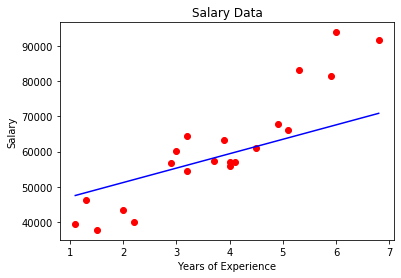

In [36]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Data")
plt.show()

## Using $R^2$ as the metric for accuracy measurement.

In [11]:
def r_squared(y_true,y_pred):
    y_avg = np.sum(y_true) / len(y_true)
    res_error = np.sum((y_true - y_pred)**2)
    total_error  = np.sum((y_true - y_avg)**2)
    
    result = 1 - res_error / total_error
    return result

In [12]:
loss = r_squared(y_train,model.predict(X_train))
print(loss)

0.5796118058226201


## Using Sklearn to compare the performance of it.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred2 = regressor.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1.1 1.3 1.5 2.  2.2 2.9 3.  3.2 3.2 3.7 3.9 4.  4.  4.1 4.5 4.9 5.1 5.3
 5.9 6.  6.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.